# cse-221710309021-Ramani


Read the dataset below which was used for Logistic Regression: https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv <br>

Apply the KNN Algorithm on the dataset .<br>
Compute all the classification metrics<br>
Plot the ROC Curve for the model and find the AUC<br>
Compare the AUC of KNN Model with Logistic Regression Model and find which Model has higher AUC<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
data.drop(['CASENUM'],axis=1,inplace=True)
data

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [4]:
data.isnull().sum()


ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [5]:
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
data.apply(lambda col:fill_na(col))

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,10.0,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [6]:
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [7]:
X = data.iloc[:,1:]
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [8]:
y=data.ATTORNEY
y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

In [9]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)


# Logistic Regression

In [10]:
# Training Data
from  sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)


C:\Users\SATYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_train_pred = reg.predict(X_train)
y_train_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,

In [12]:

from sklearn.metrics import confusion_matrix,accuracy_score
conf = confusion_matrix(y_train,y_train_pred)
conf


array([[314, 173],
       [ 95, 356]], dtype=int64)

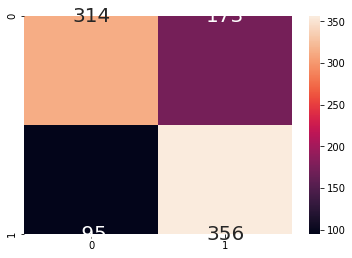

In [13]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [14]:

# Testing Data
from  sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_test,y_test)

C:\Users\SATYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_test_pred = reg.predict(X_test)
y_test_pred


array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf = confusion_matrix(y_test,y_test_pred)
conf

array([[ 99,  99],
       [ 36, 168]], dtype=int64)

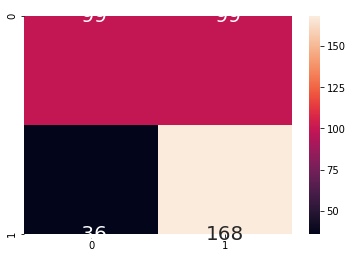

In [17]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [18]:

from sklearn.metrics import classification_report
# Syntax: classification_report(actualValues,predictedValues)
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       487
           1       0.67      0.79      0.73       451

    accuracy                           0.71       938
   macro avg       0.72      0.72      0.71       938
weighted avg       0.72      0.71      0.71       938

              precision    recall  f1-score   support

           0       0.73      0.50      0.59       198
           1       0.63      0.82      0.71       204

    accuracy                           0.66       402
   macro avg       0.68      0.66      0.65       402
weighted avg       0.68      0.66      0.65       402



# KNN Algorithm

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.864142,0.323773,-0.118550,1.125005,0.482957
1,0.864142,0.323773,-0.118550,-1.005695,0.121123
2,-1.157217,0.323773,-0.118550,-1.107157,0.660376
3,0.864142,0.323773,8.435274,-1.310081,-0.030183
4,-1.157217,0.323773,-0.118550,-0.802771,0.065398
...,...,...,...,...,...
933,0.864142,0.323773,-0.118550,1.226466,-0.410509
934,0.864142,0.323773,-0.118550,1.023543,-0.232465
935,0.864142,0.323773,-0.118550,-0.549116,-0.030683
936,-1.157217,0.323773,-0.118550,-0.802771,-0.415507


In [20]:

scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
scaled_X_test


,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,-1.083039,0.289064,-0.151330,-0.780654,-0.324633
1,-1.083039,0.289064,-0.151330,-0.780654,3.001351
2,0.923328,0.289064,-0.151330,-0.879464,-0.268778
3,0.923328,0.289064,-0.151330,-0.928870,0.185782
4,0.923328,0.289064,6.608076,0.899128,3.381416
...,...,...,...,...,...
397,0.923328,0.289064,-0.151330,-1.126491,-0.304262
398,0.923328,0.289064,-0.151330,1.689614,-0.278698
399,-1.083039,0.289064,-0.151330,-0.879464,-0.200275
400,-1.083039,0.289064,6.608076,0.207453,-0.322170


In [21]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)#,metric='euclidean')
    knn_model.fit(scaled_X_train,y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test,pred_test))
scores

[0.582089552238806,
 0.5671641791044776,
 0.6194029850746269,
 0.6169154228855721,
 0.6442786069651741,
 0.5870646766169154,
 0.654228855721393,
 0.6169154228855721,
 0.6243781094527363,
 0.6019900497512438,
 0.6318407960199005,
 0.6144278606965174,
 0.6517412935323383,
 0.6368159203980099,
 0.6343283582089553,
 0.6169154228855721,
 0.6417910447761194,
 0.6343283582089553,
 0.6442786069651741]

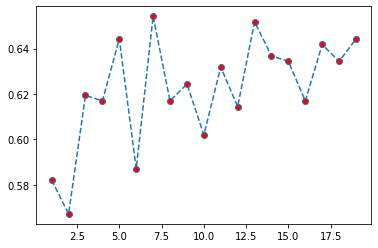

In [22]:
plt.plot(range(1,20),scores,marker='o',markerfacecolor='r',linestyle='--')

In [23]:
final_model = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [24]:
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,

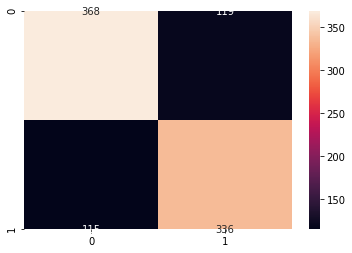

In [25]:

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot=True,fmt='d')

In [26]:

print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       487
           1       0.74      0.75      0.74       451

    accuracy                           0.75       938
   macro avg       0.75      0.75      0.75       938
weighted avg       0.75      0.75      0.75       938



In [27]:

# Prediction on Test Data
final_test_pred = final_model.predict(scaled_X_test) #y_test
final_test_pred


array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,

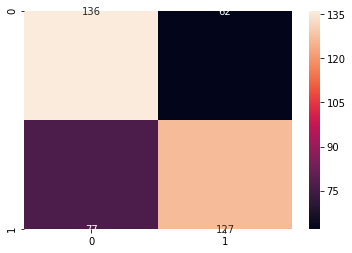

In [28]:

sns.heatmap(confusion_matrix(y_test,final_test_pred),annot=True,fmt='d')

In [29]:

print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       198
           1       0.67      0.62      0.65       204

    accuracy                           0.65       402
   macro avg       0.66      0.65      0.65       402
weighted avg       0.66      0.65      0.65       402



In [30]:

y_test_prob=final_model.predict_proba(scaled_X_test)
y_test_prob=pd.DataFrame(y_test_prob)
y_test_prob


,0,1
0,0.428571,0.571429
1,1.000000,0.000000
2,0.571429,0.428571
3,0.714286,0.285714
4,0.714286,0.285714
...,...,...
397,0.714286,0.285714
398,0.285714,0.714286
399,0.428571,0.571429
400,0.714286,0.285714


In [31]:

# Logistic Regression
y_test_prob1=reg.predict_proba(X_test)
y_test_prob1=pd.DataFrame(y_test_prob1)
y_test_prob1

,0,1
0,0.415945,0.584055
1,0.998492,0.001508
2,0.368043,0.631957
3,0.596542,0.403458
4,0.999409,0.000591
...,...,...
397,0.348511,0.651489
398,0.392773,0.607227
399,0.477837,0.522163
400,0.524948,0.475052


In [32]:

y_test

1186    1
403     0
1062    1
523     0
1286    0
       ..
1088    0
65      1
508     0
765     0
967     0
Name: ATTORNEY, Length: 402, dtype: int64

In [33]:

from sklearn.metrics import roc_auc_score,roc_curve
m_prob = final_model.predict_proba(scaled_X_test)[:,1]
#m_prob
fpr,tpr,threshold = roc_curve(y_test,m_prob,pos_label=1)
print(fpr)
print(tpr)
print(threshold)
print(pd.DataFrame(threshold))

[0.         0.02525253 0.05555556 0.20707071 0.31313131 0.53535354
 0.7979798  0.9040404  1.        ]
[0.         0.05392157 0.1127451  0.34313725 0.62254902 0.78921569
 0.93627451 0.99019608 1.        ]
[2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]
          0
0  2.000000
1  1.000000
2  0.857143
3  0.714286
4  0.571429
5  0.428571
6  0.285714
7  0.142857
8  0.000000


In [34]:

# Logistic Regression
m_prob1 = reg.predict_proba(scaled_X_test)[:,1]
fpr1,tpr1,threshold1 = roc_curve(y_test,m_prob1,pos_label=1)

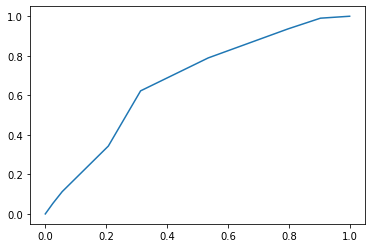

In [35]:

plt.plot(fpr,tpr)

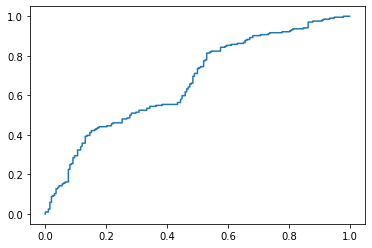

In [36]:

# Logistic Regression
plt.plot(fpr1,tpr1)


In [37]:
roc_auc_score(y_test,m_prob)

0.6700460487225194

In [38]:

# Logistic Regression 
roc_auc_score(y_test,m_prob1)

0.6689814814814814